# Assignment 11
Consider the following web app

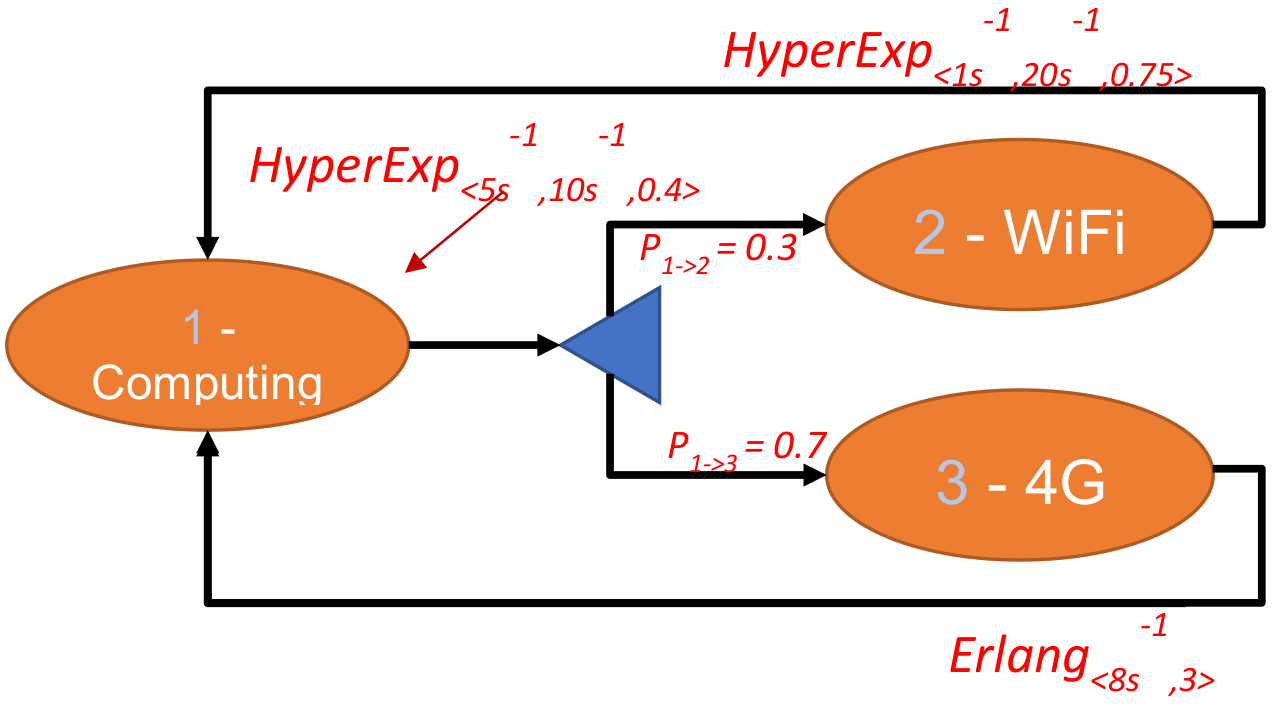

## Requests
- Draw the corresponding **CTMC model**
- Considering a job completed when it either completes a WiFi or a 4G message, compute the **system throughput**
- Compute the **probabilities** of being in the Computing state, in the WiFi state or in the 4G state.

## Drawing the CTMC model
The continuous time markov chain model is shown in the following picture:




The parameters of the model are:
- $P_{1\rightarrow2}$ = 0.3
- $P_{1\rightarrow3}$ = 0.7
- $P_{11}$ = 0.4
- $P_{12}$ = 0.6
- $P_{21}$ = 0.75
- $P_{22}$ = 0.25
- $\lambda_{11}$ = 5 $s^{-1}$
- $\lambda_{12}$ = 10 $s^{-1}$
- $\lambda_{21}$ = 1 $s^{-1}$
- $\lambda_{22}$ = 0.20 $s^{-1}$
- $\lambda_{3}$ = 8 $s^{-1}$

In [1]:
p_1t2 = 0.3
p_1t3 = 0.7
p_11 = 0.4
p_12 = 0.6
p_21 = 0.75
p_22 = 0.25
l_11 = 5
l_12 = 10
l_21 = 1
l_22 = 0.20
l_3 = 8

Since we need to compute the throughput of the system, we need to assign a reward *c* to each edge of the model according to the number of completions we achieve when that edge is taken 

| | $1_{1}$ | $1_{2}$ | $2_{1}$ | $2_{2}$ | $3_{1}$ | $3_{2}$ | $3_{3}$ |
| --- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| $1_{1}$ | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $1_{2}$ | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $2_{1}$ | 1 | 1 | 0 | 0 | 0 | 0 | 0 |
| $2_{2}$ | 1 | 1 | 0 | 0 | 0 | 0 | 0 |
| $3_{1}$ | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $3_{2}$ | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $3_{3}$ | 1 | 1 | 0 | 0 | 0 | 0 | 0 |
 


In [2]:
import numpy as np
c = np.array( 
    [[0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0]])

## Computation of the infinitesimal generator

The infinitesimal generator of the system is:

$$Q = \begin{bmatrix}
-P_{1\rightarrow2}*P_{21}*\lambda_{11}-P_{1\rightarrow2}*P_{22}*\lambda_{11}-P_{1\rightarrow3}*\lambda_{11}
& 0 & P_{1\rightarrow2}*P_{21}*\lambda_{11} & P_{1\rightarrow2}*P_{22}*\lambda_{11} & P_{1\rightarrow3}*\lambda_{11} & 0 & 0 \\
0 & -P_{1\rightarrow2}*P_{21}*\lambda_{12}-P_{1\rightarrow2}*P_{22}*\lambda_{12}-P_{1\rightarrow3}*\lambda_{12} & P_{1\rightarrow2}*P_{21}*\lambda_{12} & P_{1\rightarrow2}*P_{22}*\lambda_{12} & P_{1\rightarrow3}*\lambda_{12} & 0 & 0 \\
P_{11}*\lambda_{21} & P_{12}*\lambda_{21} & -P_{11}*\lambda_{21}-P_{12}*\lambda_{21} & 0 & 0 & 0 & 0 \\
P_{11}*\lambda_{22} & P_{12}*\lambda_{22} & 0 & -P_{11}*\lambda_{22}-P_{12}*\lambda_{22} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -\lambda_{3} & \lambda_{3} & 0 \\
0 & 0 & 0 & 0 & 0 & -\lambda_{3} & \lambda_{3} \\
P_{11}*\lambda_{3} & P_{12}*\lambda_{3} & 0 & 0 & 0 & 0 & -P_{11}*\lambda_{3}-P_{12}*\lambda_{3} \\
\end{bmatrix}$$


In [3]:
Q = np.array(
    [
        [-p_1t2*p_21*l_11-p_1t2*p_22*l_11-p_1t3*l_11, 0, p_1t2*p_21*l_11, p_1t2*p_22*l_11, p_1t3*l_11, 0, 0],
        [0, -p_1t2*p_21*l_12-p_1t2*p_22*l_12-p_1t3*l_12, p_1t2*p_21*l_12, p_1t2*p_22*l_12, p_1t3*l_12, 0, 0],
        [p_11*l_21, p_12*l_21, -p_11*l_21-p_12*l_21, 0, 0, 0, 0],
        [p_11*l_22, p_12*l_22, 0, -p_11*l_22-p_12*l_22, 0, 0, 0],
        [0, 0, 0, 0, -l_3, l_3, 0],
        [0, 0, 0, 0, 0, -l_3, l_3],
        [p_11*l_3, p_12*l_3, 0, 0, 0, 0, -p_11*l_3-p_12*l_3]
    ])

## Compute the probabilities

Here I assume the probabilities and the throughput are to be computed at steady state.

In [4]:
u = [1, 0, 0, 0, 0, 0, 0]

Q_steady = Q.copy()
Q_steady[:,0] = [1, 1, 1, 1, 1, 1, 1]

ss_probabilities = np.matmul(u, np.linalg.inv(Q_steady))

print("The steady state probabilities found are:\n")
print("11\t{:%}".format(ss_probabilities[0]))
print("12\t{:%}".format(ss_probabilities[1]))
print("21\t{:%}".format(ss_probabilities[2]))
print("22\t{:%}".format(ss_probabilities[3]))
print("31\t{:%}".format(ss_probabilities[4]))
print("32\t{:%}".format(ss_probabilities[5]))
print("33\t{:%}".format(ss_probabilities[6]))

print("\nThe probability of being in the computing state is {:.4%}".format(ss_probabilities[0]+ss_probabilities[1]))
print("The probability of being in the wifi state is {:.4%}".format(ss_probabilities[2]+ss_probabilities[3]))
print("The probability of being in the computing state is {:.4%}".format(ss_probabilities[4]+ss_probabilities[5]+ss_probabilities[6]))

#print(sum(ss_probabilities))

The steady state probabilities found are:

11	7.980050%
12	5.985037%
21	22.443890%
22	37.406484%
31	8.728180%
32	8.728180%
33	8.728180%

The probability of being in the computing state is 13.9651%
The probability of being in the wifi state is 59.8504%
The probability of being in the computing state is 26.1845%


## Throughput

In [5]:
C = c*Q
#print(C)
x = np.sum(C,axis=1)
#print(x)
# we sum each row of the C matrix. Since we have 0es
# on each element of the diagonal of c, we don't need
# to filter out those elements from the sum.
X = np.sum(ss_probabilities * x)
print("The throughput of the system at the steady state is {:.4f}".format(X))

The throughput of the system at the steady state is 0.9975
